In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.utils import img_to_array,load_img

ModuleNotFoundError: No module named 'keras'

In [3]:
!wget https://www.dropbox.com/s/w1suleujg5da7nf/archive.zip?dl=0
!unzip archive.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find any matches for wildcard specification "archive.zip?dl=0".

No zipfiles found.


In [3]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator( preprocessing_function=preprocess_input)

In [4]:
train=train_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                        target_size=(256,256),
                                        batch_size=32)

val=val_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                        target_size=(256,256),
                                        batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [5]:
#Buiding Model

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import keras


In [6]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 3s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable=False

In [8]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [9]:
X= Flatten()(base_model.output)

X=Dense(units=38, activation='softmax')(X)



model= Model(base_model.input,X)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [11]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [14]:
# Early Stopping

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor='val_accuracy',patience=3, verbose=1,min_delta=0.01)

mc = ModelCheckpoint(filepath="best1_model.h5", monitor='val_accuracy',verbose=1,save_best_only=True,min_delta=0.01,patience=3)

cb = [ mc]

In [15]:
his= model.fit_generator(train,steps_per_epoch=16,epochs= 50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)

<ipython-input-15-62cb9371d0fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his= model.fit_generator(train,steps_per_epoch=16,epochs= 50, verbose=1, callbacks=cb, validation_data=val, validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 9.4762 - accuracy: 0.6797
Epoch 1: val_accuracy improved from -inf to 0.80273, saving model to best1_model.h5
16/16 [==============================] - 14s 893ms/step - loss: 9.4762 - accuracy: 0.6797 - val_loss: 5.0680 - val_accuracy: 0.8027
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 9.1320 - accuracy: 0.6758
Epoch 2: val_accuracy improved from 0.80273 to 0.81836, saving model to best1_model.h5
16/16 [==============================] - 16s 1s/step - loss: 9.1320 - accuracy: 0.6758 - val_loss: 6.0366 - val_accuracy: 0.8184
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 7.7570 - accuracy: 0.7109
Epoch 3: val_accuracy did not improve from 0.81836
16/16 [==============================] - 15s 972ms/step - loss: 7.7570 - accuracy: 0.7109 - val_loss: 7.3479 - val_accuracy: 0.7695
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 9.6357 - accuracy: 0.7109
Epoch 4: 

In [16]:
h=his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

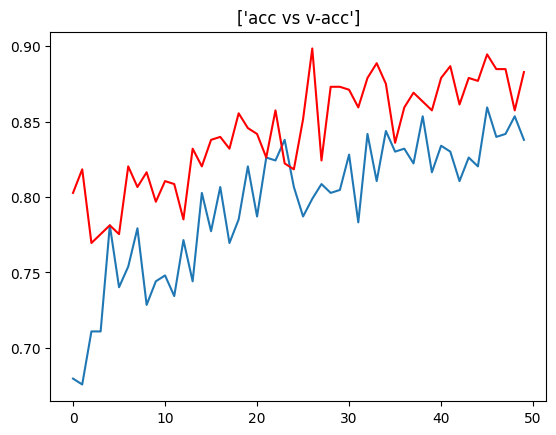

In [17]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title(['acc vs v-acc'])
plt.show()

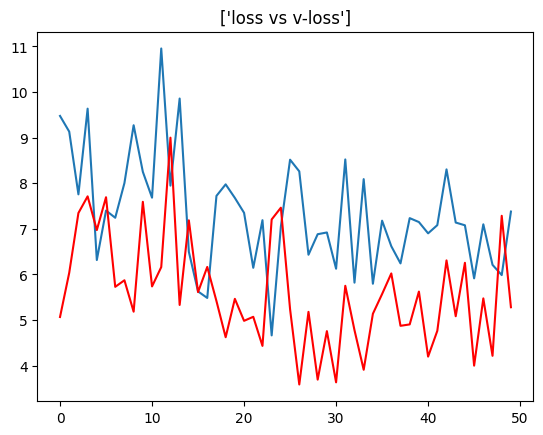

In [18]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title(['loss vs v-loss'])
plt.show()

In [7]:
#load best model

from keras.models import load_model

model=load_model("C:\\Users\\Biswarup Mistry\\Downloads\\best2_model.h5")

ModuleNotFoundError: No module named 'keras'

In [20]:
acc= model.evaluate_generator(val)[1]

print(acc*100)

<ipython-input-20-48346601b78f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= model.evaluate_generator(val)[1]


86.19394302368164


In [21]:
ref= dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))
print(ref)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [22]:
def predict(path):

    img=load_img(path,target_size=(256,256))

    i=img_to_array(img)

    im=preprocess_input(i)

    img=np.expand_dims(im,axis=0)

    pred=np.argmax(model.predict(img))

    print(f"the image belongs to {ref[pred]}")

In [23]:
path="test/test/CornCommonRust3.JPG"

predict(path)

1/1 [==============================] - 1s 758ms/step
the image belongs to Corn_(maize)___Common_rust_


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
model.save('/content/drive/MyDrive/models/best2_model.h5')


In [ ]:
import tensorflow as tf

# Load the h5 model
model = tf.keras.models.load_model('/content/drive/MyDrive/models/best1_model.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('/content/drive/MyDrive/models/model.tflite', 'wb') as f:
    f.write(tflite_model)